# Infnet

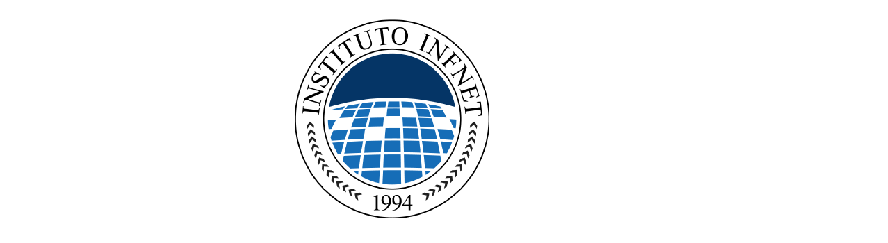

# SPARK

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=211d1dee51feefbc59c9a8562624711501c5ed8743072c37c63b001f5e16be51
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [ ]:
import random
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Aula_Spark") \
    .getOrCreate()

df=spark.range(100) # Cria dataframe com 100 linhas
#print(df.collect()) # Imprime as 100 linhas
print(df.sample(0.05).collect()) # Retorna aproximadamente 5% de amostra aleatória

[Row(id=22), Row(id=36), Row(id=45), Row(id=58), Row(id=70), Row(id=79), Row(id=91)]


# MapReduce


In [ ]:
counts = spark.sparkContext.textFile('blogSpark.txt')  \
            .flatMap(lambda line: line.split(" "))  \
            .map(lambda word: (word, 1))  \
            .reduceByKey(lambda a, b: a + b) 
counts.saveAsTextFile("resultado/result")

Word Count Via Função

In [ ]:
#https://www.geeksforgeeks.org/string-punctuation-in-python/
# import string library function 
import string 
    
# Storing the sets of punctuation in variable result 
result = string.punctuation 
    
# Printing the punctuation values 
print("Resultado 1",result) 

print("Resultado 2",' ' * (11+len(string.punctuation)))

Resultado 1 !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Resultado 2                                            


In [ ]:
#https://www.w3schools.com/python/ref_string_maketrans.asp
txt = "Hello Sam!"
mytable = str.maketrans("S", "P")
print(txt.translate(mytable))

Hello Pam!


In [ ]:
def wordCount(file):
  import string 
  punctFilter = str.maketrans(string.punctuation + '0123456789’', ' ' * (11+len(string.punctuation)))
  
  rdd = spark.sparkContext.textFile(file)\
           .map(lambda line: line.translate(punctFilter).strip().upper())\
           .flatMap(lambda line: [(word,1) for word in line.split()])\
           .reduceByKey(lambda x,y : x + y)\
           .sortBy(lambda kv: kv[1], ascending=False)
  return rdd

In [ ]:
import time
t = time.time()
words_rdd = wordCount("blogSpark.txt")
data = words_rdd.collect()
t = time.time() - t
print('Time elapsed: %f s' % t)
print('First 20 elements in the list with %d elements ' % len(data))
data[:20]

Time elapsed: 0.926091 s
First 20 elements in the list with 158 elements 


[('DE', 49),
 ('DADOS', 19),
 ('O', 18),
 ('QUE', 15),
 ('SPARK', 14),
 ('EM', 14),
 ('UMA', 13),
 ('PROCESSAMENTO', 12),
 ('É', 11),
 ('PARA', 10),
 ('E', 10),
 ('GRANDES', 7),
 ('CONJUNTOS', 6),
 ('ISSO', 6),
 ('PLATAFORMA', 6),
 ('TORNA', 5),
 ('COM', 5),
 ('A', 5),
 ('MAIS', 5),
 ('UM', 4)]

In [ ]:
# reduce is another action (not a transformation like reduceByKey!)
# We can use it obtain the total number of words
total_words = words_rdd.values().reduce(lambda x,y: x+y)
print('Total words [1]: %d' % total_words)

# We can just use the sum utility action in this case
total_words = words_rdd.values().sum()
print('Total words [2]: %d' % total_words)

Total words [1]: 428
Total words [2]: 428


word frequencies

In [ ]:
freq_rdd = words_rdd.map(lambda kv: (kv[0], kv[1] / total_words))
freq_rdd.take(10)

[('DE', 0.11448598130841121),
 ('DADOS', 0.04439252336448598),
 ('O', 0.04205607476635514),
 ('QUE', 0.035046728971962614),
 ('SPARK', 0.03271028037383177),
 ('EM', 0.03271028037383177),
 ('UMA', 0.030373831775700934),
 ('PROCESSAMENTO', 0.028037383177570093),
 ('É', 0.02570093457943925),
 ('PARA', 0.02336448598130841)]

In [ ]:
# Simpler alternative 
freq_rdd = words_rdd.mapValues(lambda count: count / total_words)
freq_rdd.take(10)

[('DE', 0.11448598130841121),
 ('DADOS', 0.04439252336448598),
 ('O', 0.04205607476635514),
 ('QUE', 0.035046728971962614),
 ('SPARK', 0.03271028037383177),
 ('EM', 0.03271028037383177),
 ('UMA', 0.030373831775700934),
 ('PROCESSAMENTO', 0.028037383177570093),
 ('É', 0.02570093457943925),
 ('PARA', 0.02336448598130841)]